In [1]:
import numpy as np

In [2]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller

In [3]:
import matplotlib.pyplot as plt

In [4]:
#AR(2) :  Yt = 1+ 0.33Yt-1 + 0.5Yt-2


In [6]:
ar2 = np.array([1, 0.33, 0.5])
ma = np.array([1])
simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=10000)

In [8]:
ar2

array([1.  , 0.33, 0.5 ])

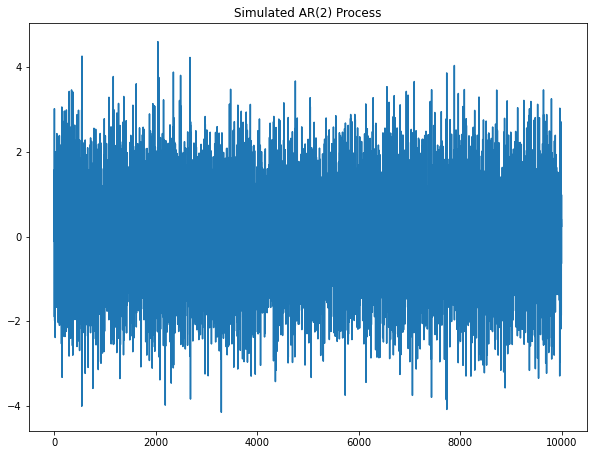

In [9]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()

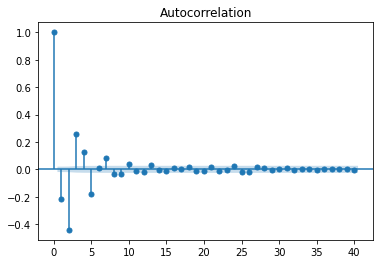

In [10]:
plot_acf(simulated_AR2_data);

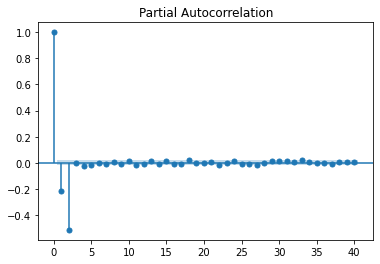

In [11]:
plot_pacf(simulated_AR2_data);

In [12]:
pacf_coef_AR2 = pacf(simulated_AR2_data)
print(pacf_coef_AR2)

[ 1.00000000e+00 -2.17846293e-01 -5.13792715e-01  1.10836321e-04
 -2.66313585e-02 -1.91593796e-02  1.71851854e-05 -1.23061333e-02
  4.22543765e-03 -7.21949498e-03  1.60369569e-02 -1.39828720e-02
 -7.37495427e-03  1.36694976e-02 -6.51533842e-03  1.02073808e-02
 -7.72512258e-03 -7.25096886e-03  2.19571619e-02 -3.77317021e-03
  7.94019889e-04  3.33372199e-03 -1.96253881e-02 -3.19268996e-03
  1.50494978e-02 -1.15164308e-02 -8.76341845e-03 -1.32982050e-02
  2.86659813e-05  1.07200927e-02  1.12106875e-02  1.57735146e-02
  7.48423318e-03  1.82919811e-02  3.47356577e-03  1.39161771e-03
 -7.68730211e-04 -6.11731735e-03  2.72769030e-03  6.17452467e-03
  4.27635128e-03]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


In [13]:
rho, residual_sd = yule_walker(simulated_AR2_data, 2, method='mle')

In [15]:
print(f'rho: {-rho}')
print(f'residual standart deviation: {residual_sd}')

rho: [0.32971766 0.51368484]
residual standart deviation: 0.9999870573702654


In [16]:
#AR(3) :  Yt = 1+ 0.33Yt-1 + 0.5Yt-2 + 0.07Yt-3

In [18]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma3= np.array([1])
simulated_AR3_data = ArmaProcess(ar3,ma3).generate_sample(nsample=10000)

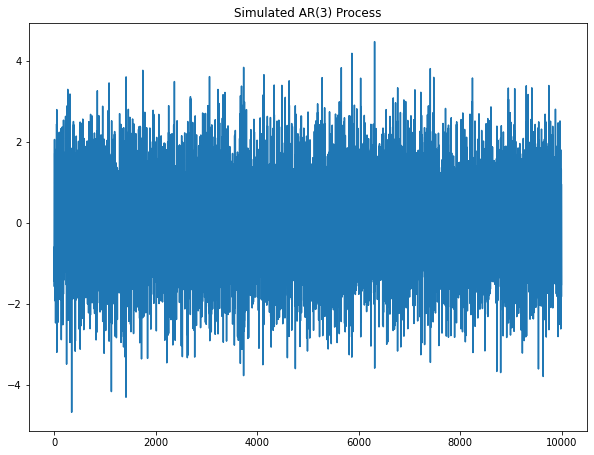

In [19]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR3_data)
plt.title("Simulated AR(3) Process")
plt.show()

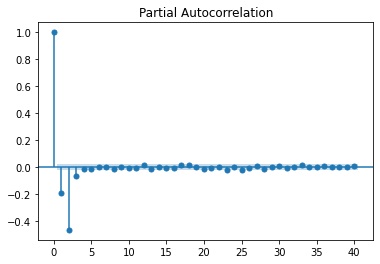

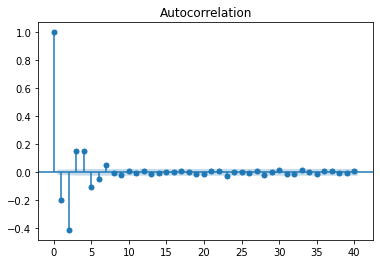

In [20]:
plot_pacf(simulated_AR3_data);
plot_acf(simulated_AR3_data);

In [21]:
rho, residual_sd = yule_walker(simulated_AR3_data, 3, method='mle')
print(f'rho: {-rho}')
print(f'residual_sd: {residual_sd}')

rho: [0.31730427 0.48621599 0.06942304]
residual_sd: 0.9971571516349196


In [22]:
import pandas as pd

In [24]:
data = pd.read_csv('jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


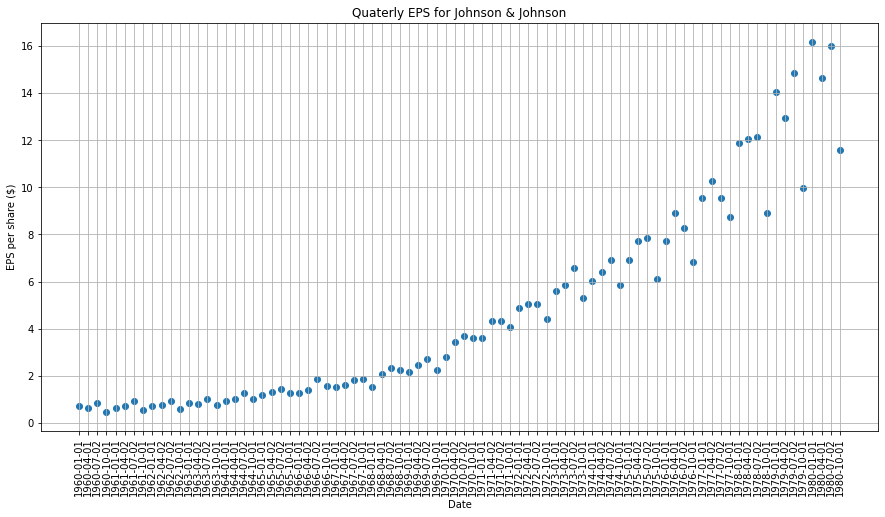

In [25]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(data['date'], data['data'])
plt.title('Quaterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [26]:
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [27]:
data['data'] = np.log(data['data'])

In [28]:
data.head()

,date,data
0,1960-01-01,-0.342490
1,1960-04-01,-0.462035
2,1960-07-02,-0.162519
3,1960-10-01,-0.820981
4,1961-01-01,-0.494296


In [29]:
data['data'] = data['data'].diff() # Xt = Xt - Xt-1

In [30]:
data.head()

,date,data
0,1960-01-01,NaN
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684


In [31]:
data = data.drop(data.index[0])
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


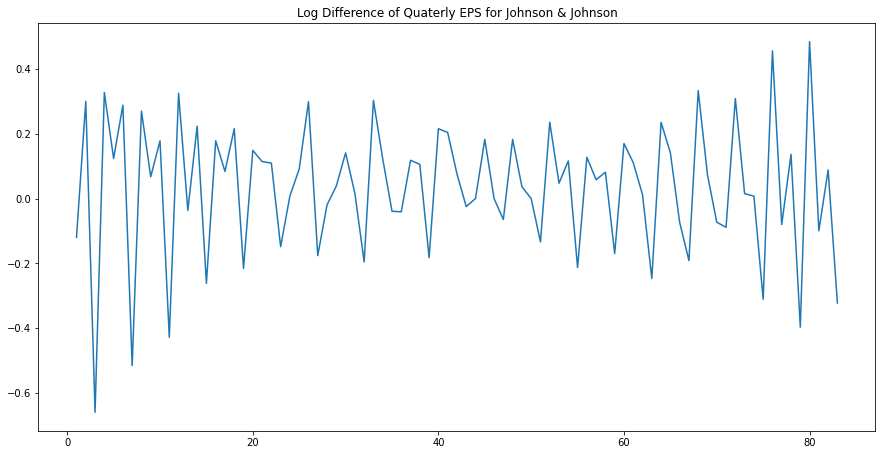

In [32]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['data'])
plt.title("Log Difference of Quaterly EPS for Johnson & Johnson")
plt.show()

In [33]:
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811829
p-value: 0.00041497314044407825


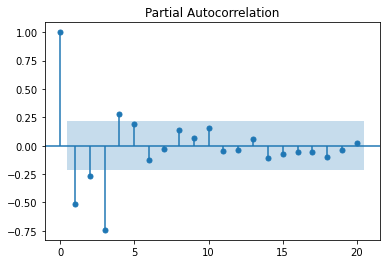

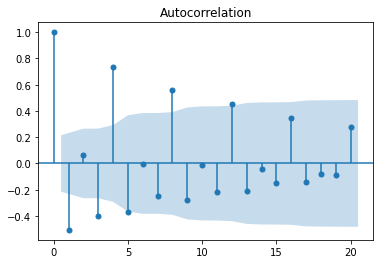

In [34]:
plot_pacf(data['data']);
plot_acf(data['data']);

In [35]:
# Try a AR(4) model
rho, sigma = yule_walker(data['data'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175


In [36]:
# Yt = 0.11 + 0.636Yt-1 + 0.536Yt-2 + 0.506Yt-3 - 0.28Yt-4